In [0]:
import os
import random

import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
from keras.layers import (Activation, Add, BatchNormalization, Convolution2D,
                          Dense, Dropout, Flatten, MaxPooling2D)
from keras.models import Sequential
from keras.utils import np_utils
from matplotlib import pyplot as plt
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


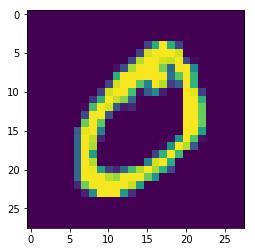

In [0]:
print(X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".

# This will show the files of your current drive,upload your data file like csv,txt in the root dir(home page) of your google drive
# !ls "/content/drive/My Drive"

# To go to the google drive root dir
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
datagen = ImageDataGenerator(featurewise_center=True,
                             featurewise_std_normalization=True)

In [0]:
base_dir = '/content/drive/My Drive/EVA/Session5'

if not (os.path.exists(os.path.join(base_dir, 'weights'))):
    os.mkdir(os.path.join(base_dir, 'weights'))

filepath = os.path.join('/content/drive/My Drive/EVA/Session5/weights',
                        'weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5')
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [0]:

model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28, 28, 1)))  #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(Convolution2D(32, 3, 3, activation='relu')) #24
# model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3))  #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu'))  #22

model.add(MaxPooling2D(pool_size=(2, 2)))  #11

# model.add(Convolution2D(16, 3, 3, activation='relu'))#9
# model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))  #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu'))#7
# model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))  #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu'))#5
# model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))  #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))
# model.add(Dropout(0.1))

# model.add(Convolution2D(16, 3, 3, activation='relu'))#3
# model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3))  #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0822 06:24:57.709629 140387365414784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
W0822 06:24:57.749992 140387365414784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 06:24:57.756935 140387365414784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 06:24:57.797771 140387365414784 deprecation_wrapper.py:119] From /u

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
__________

#Question? 
The loss function is copied from someone's code.

len(model.layers[0].get_weights()) = 1 but len(model.layers[1].get_weights()) = 4. We just added BN. Why weight array len changes? What are the extra params?
Rohan's Answer ==>


In [0]:
def reg_term(lamda):
    w2 = 0
    for i in range(len(model.layers)):
        if len(model.layers[i].get_weights()) > 0:
            t = np.sum(model.layers[i].get_weights()[0] *
                       model.layers[i].get_weights()[0])
            w2 = w2 + t
        w2 = w2*(lamda/(2*X_train.shape[0]))
        return w2
    
def loss_l2(y_true,y_pred):
    return K.categorical_crossentropy(y_true,y_pred) + reg_term(lamda)

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler


def scheduler(epoch, lr):
    return round(0.003 * 1 / (1 + 0.319 * epoch), 10)

# setting lamda
lamda = 0.01
# compile model with custom loss
model.compile(loss=loss_l2,
              optimizer=Adam(lr=0.003),
              metrics=['accuracy'])

model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=128),
    epochs=50,
    verbose=1,
    steps_per_epoch=len(X_train) // 128,
    validation_data=datagen.flow(X_test, Y_test),
    validation_steps=len(X_test) // 128,
    callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

W0821 17:09:19.575544 140423201544064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 17:09:20.013829 140423201544064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
468/468 [==============================] - 17s 37ms/step - loss: 0.5835 - acc: 0.8418 - val_loss: 0.1125 - val_acc: 0.9852

Epoch 00001: val_acc improved from -inf to 0.98518, saving model to /content/drive/My Drive/EVA/Session5/weights/weights-improvement-01-0.9852.hdf5
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
468/468 [==============================] - 13s 28ms/step - loss: 0.3461 - acc: 0.8840 - val_loss: 0.0869 - val_acc: 0.9824

Epoch 00002: val_acc did not improve from 0.98518
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
468/468 [==============================] - 13s 27ms/step - loss: 0.3149 - acc: 0.8882 - val_loss: 0.0590 - val_acc: 0.9860

Epoch 00003: val_acc improved from 0.98518 to 0.98598, saving model to /content/drive/My Drive/EVA/Session5/weights/weights-improvement-03-0.9860.hdf5
Epoch 4/50

Epoch 00004: LearningRateSc

#Question? 
Why do we get score as .994 even though i saved the model with .9972

My understanding ==> The model I saved during training, it checks the val_acc after the end of each epoch(not batch wise). So val_acc printed is calculated on the entire val_data. So when i do model.predict on val data using the same model, it should give me the same acc(because i am passing the entire val data)

Rohan's Answer ==>


In [0]:
from keras.models import load_model
from keras.utils.generic_utils import get_custom_objects


lamda = 0.01
model = load_model(
    os.path.join(base_dir, 'weights/weights-improvement-32-0.9972.hdf5'),custom_objects={'loss_l2': loss_l2})
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

W0822 06:29:19.686054 140387365414784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[0.021351633937470613, 0.9946]


In [0]:
# find the misclassified images

In [0]:
pred = model.predict(X_test)
miss_label_index = []

# if the argmax of pred doesn't match with Y_test argmax that means pred is wrong

for i, each_pred in enumerate(pred):
    if np.argmax(each_pred) != np.argmax(Y_test[i]):
        miss_label_index.append(i)

In [36]:
# Total misclassified images out of 10k X_test
print(len(miss_label_index))

54


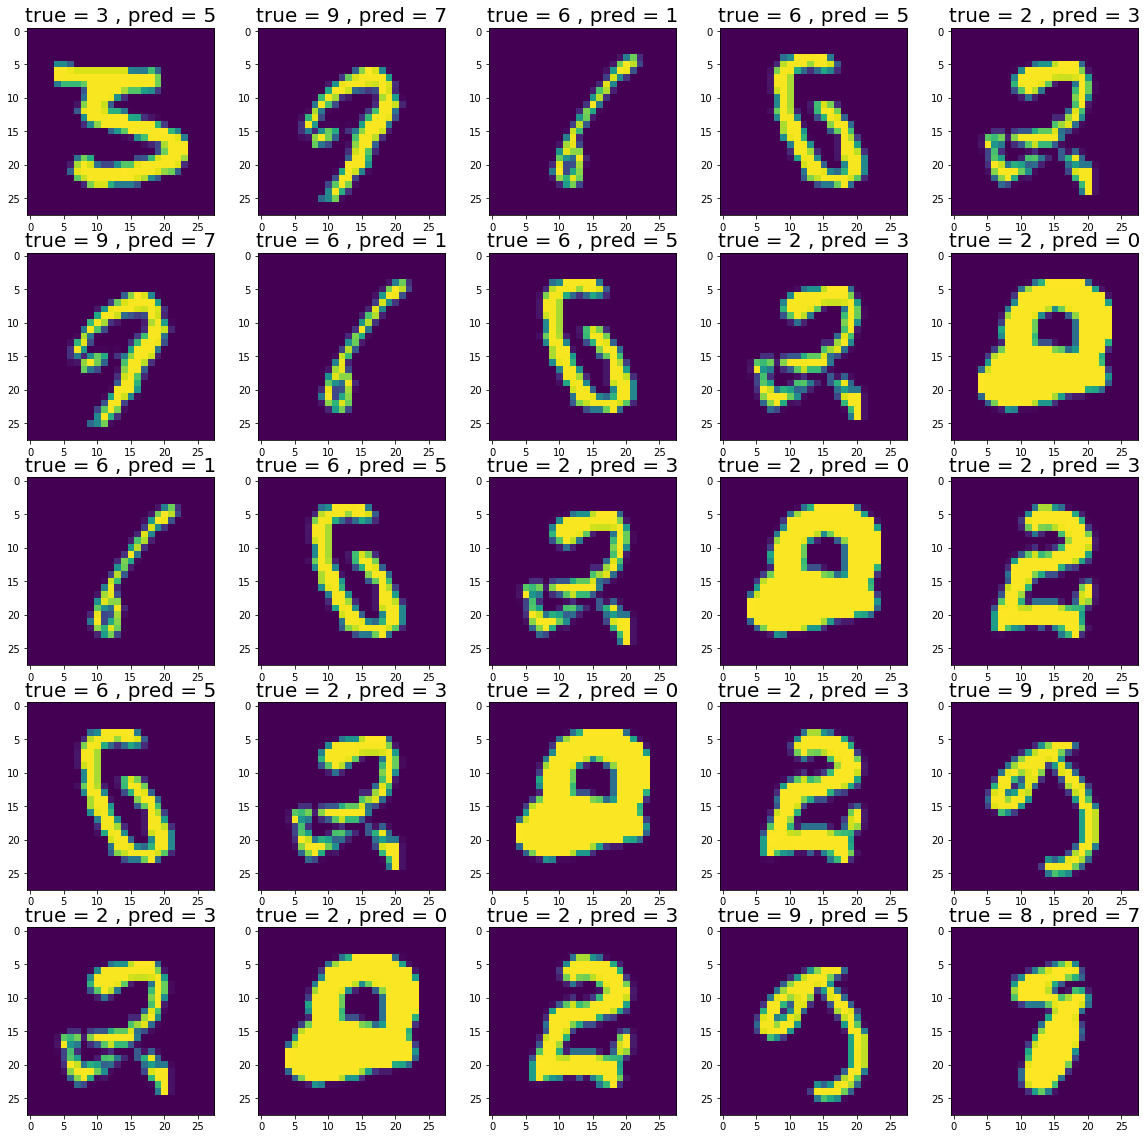

In [37]:
# random select 25 missclassified image index
miss_label_index = random.sample(miss_label_index, 25)

# plot the images with true and predicted labels
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
  
    for j in range(5):
      
        Y_test_true_label = np.argmax(Y_test[miss_label_index[i + j]])
        Y_test_pred_label = np.argmax(pred[miss_label_index[i + j]])
        X_test_image = X_test[miss_label_index[i + j]]
      
        axes[i, j].set_title('true = ' + str(Y_test_true_label) +' , pred = ' + str(Y_test_pred_label),fontsize=20)
        axes[i, j].imshow((np.squeeze(X_test_image,axis=2)))